Names:  
1) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463)

2) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638)

3) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

4) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697)

In [4]:
import pandas as pd 
import networkx as nx 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np

# Assignment 3
## Problem 3-3 Differences between real and random networks
### Load data and construct graph

In [6]:
data = pd.read_csv('./FAOSTAT_data_10-28-2021.csv') 

In [7]:
data.shape

(17592, 16)

In [10]:
data = data.fillna('NULL') 
print(data.shape)
data = data[data.Flag=='NULL'] 
print(data.shape)

(16619, 16)
(16619, 16)


In [11]:
data.head()

,Domain Code,Domain,Reporter Country Code (FAO),Reporter Countries,Partner Country Code (FAO),Partner Countries,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FT,Forestry Trade Flows,2,Afghanistan,68,France,5922,Export Value,1633,"Sawnwood, non-coniferous all",2017,2017,1000 US$,37,NULL,Official data
1,FT,Forestry Trade Flows,2,Afghanistan,254,Others (adjustment),5922,Export Value,1633,"Sawnwood, non-coniferous all",2017,2017,1000 US$,0,NULL,Official data
2,FT,Forestry Trade Flows,2,Afghanistan,254,Others (adjustment),5922,Export Value,1671,Newsprint,2017,2017,1000 US$,0,NULL,Official data
3,FT,Forestry Trade Flows,2,Afghanistan,165,Pakistan,5922,Export Value,1671,Newsprint,2017,2017,1000 US$,2,NULL,Official data
4,FT,Forestry Trade Flows,3,Albania,11,Austria,5922,Export Value,1633,"Sawnwood, non-coniferous all",2017,2017,1000 US$,29,NULL,Official data


In [ ]:
data['Reporter Countries'].unique()

In [ ]:
data['Partner Countries'].unique() 

In [15]:
data=data[(data['Partner Countries']!='Others (adjustment)') 
         &(data['Partner Countries']!='Total FAO') 
         &(data['Partner Countries']!='Unspecified Area')] 
 
data.shape 

(15402, 16)

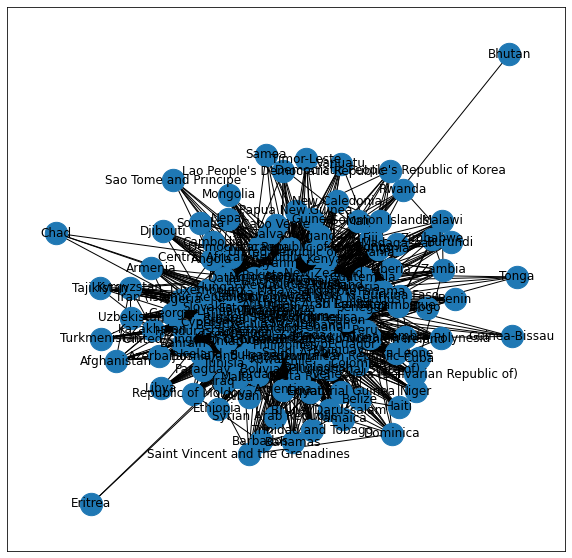

In [23]:
G = nx.Graph() 
G.add_weighted_edges_from(data[["Reporter Countries", "Partner Countries","Value"]].itertuples(index=False),weight='Value') 
plt.figure(figsize=(10,10))
nx.draw_networkx(G, node_size=500)
plt.show()

In [18]:
print(nx.info(G))

Graph with 168 nodes and 4102 edges


### 1.
extract ego graph $G_{France}$

In [40]:
GFr = nx.ego_graph(G,"France")
print(nx.info(GFr))
#ignore direction of edges
GFr = GFr.to_undirected()

Graph with 122 nodes and 3380 edges


Filling out table


---
$N$ | $L$ | $L_{min}$| $L_{max}$| $k_{min}$ | $k_{max}$
---



In [49]:
degrees = [val for (node, val) in GFr.degree()]
N = GFr.number_of_nodes()
table = pd.DataFrame.from_dict({'N': [N],
                                'L': [GFr.number_of_edges()],
                                'Lmin': [N-1],
                                'Lmax': [N*(N-1)/2],
                                'kmin': [min(degrees)],
                                'kmax': [max(degrees)]})
display(table)

,N,L,Lmin,Lmax,kmin,kmax
0,122,3380,121,7381.0,4,121


### 2.  
random graph metrics
* $<k>  = \frac{\sum_i k_i }{N}$

In [50]:
k = sum(degrees)/N
print(f"<k> = {k}")

<k> = 55.40983606557377


* $p = \frac{<k>}{N-1}$

In [56]:
p = k/(N-1)
print(f"p = {p}")

p = 0.4579325294675518


* $< L >$


In [57]:
L = p*N*(N-1)/2
print(f"<L> = {L}")

<L> = 3380.0


* $<k> = \frac{2 < L >}{N}$

In [53]:
k_ = 2*L/N
print(f"<k> = {k_}")

<k> = 55.40983606557377


* $p = \frac{2<L>}{N(N-1)}$

In [58]:
p_ = 2*L/(N*(N-1))
print(f"p = {p_}")

p = 0.4579325294675518


### 3.
generate Erdős-Rényi graph realization $G_{random}$

In [60]:
Grand = nx.erdos_renyi_graph(n=N, p=p)
print(nx.info(Grand))

Graph with 122 nodes and 3398 edges


visualise adjacency matrices

* $A_{France}$

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 1 0 1]
 ...
 [0 1 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]]
(122, 122)


<Figure size 432x288 with 0 Axes>

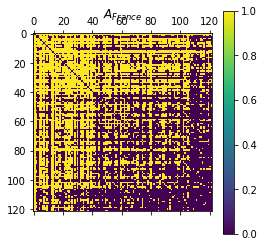

In [85]:
AFr = nx.adjacency_matrix(GFr)
print(AFr.todense())
print(AFr.shape)
AFr = AFr.toarray()
plt.figure()
plt.matshow(AFr)
plt.title("$A_{France}$")
plt.colorbar()

* $A_{random}$

[[0 1 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 [1 1 0 ... 0 1 0]
 ...
 [1 1 0 ... 0 1 0]
 [1 1 1 ... 1 0 0]
 [1 1 0 ... 0 0 0]]
(122, 122)


<Figure size 432x288 with 0 Axes>

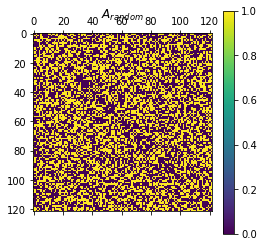

In [82]:
Arand = nx.adjacency_matrix(Grand)
print(Arand.todense())
print(Arand.shape)
Arand = Arand.toarray()
plt.figure()
plt.matshow(Arand)
plt.title("$A_{random}$")
plt.colorbar()

visual differences
* The zeroth row and column of $A_{France}$ is completely yellow (all elements are 1), which makes sense as all nodes are connected with the node "France" in $G_{France}$, "France" is a central hub in this case. 
* Compared to $A_{France}$ where a somewhat grid-like pattern is visible, the elements where the adjacency matrix is 1 (yellow) and 0 (dark blue) are more evenly distributed for $A_{random}$, no particular pattern is visible. There are more yellow elements in the upper left corner compared to the lower right corner, where gradually more and more dark blue pixels are visible for columns and rows with a higher number. This can be explained by the fact that $G_{France}$ has nodes that are connected with a lot more nodes than others, i.e. other hubs exist, while the nodes of $G_{random}$ are connected with an even probability. Its degree distribution is more even. The gradual change of colors in $A_{France}$ is due to the ordering of row and column numbers.


### 4.
* histogram of node degrees

In [123]:
from scipy.stats import norm

4
121


Text(0.5, 0, 'node degree')

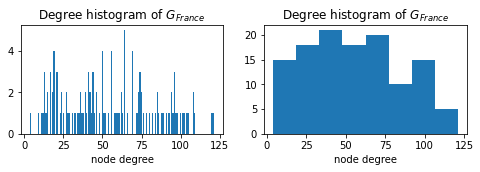

In [166]:
degFr = sorted([d for n, d in GFr.degree()], reverse=True)
print(min(degFr))
print(max(degFr))
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.bar(*np.unique(degFr, return_counts=True))
plt.title("Degree histogram of $G_{France}$")
plt.xlabel("node degree")
plt.subplot(1,2,2)
plt.hist(degFr, bins=8)
plt.title("Degree histogram of $G_{France}$")
plt.xlabel("node degree")



41
66


Text(0.5, 0, 'node degree')

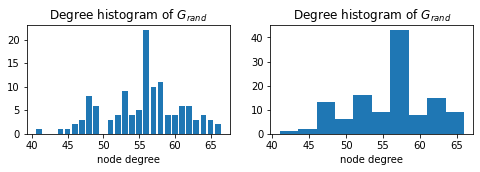

In [165]:
degrand = sorted([d for n, d in Grand.degree()], reverse=True)
print(min(degrand))
print(max(degrand))
plt.figure(figsize=(8,2))
plt.subplot(1,2,1)
plt.bar(*np.unique(degrand, return_counts=True))
plt.title("Degree histogram of $G_{rand}$")
plt.xlabel("node degree")
plt.subplot(1,2,2)
plt.hist(degrand)
plt.title("Degree histogram of $G_{rand}$")
plt.xlabel("node degree")



* normal distribution

55.704918032786885 5.228685890433883


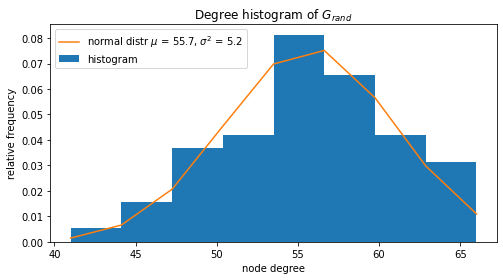

In [152]:
# normalise count to frequency
plt.figure(figsize=(8,4))
_, binsrand, _ = plt.hist(degrand, density=1, bins=8)
plt.title("Degree histogram of $G_{rand}$")
plt.ylabel("relative frequency")
plt.xlabel("node degree")
mu, sigma = norm.fit(degrand)
print(mu, sigma)
best_fit_linerand = norm.pdf(binsrand, mu, sigma)
plt.plot(binsrand, best_fit_linerand)
plt.legend([f"normal distr $\mu$ = {mu:.1f}, $\sigma^2$ = {sigma:.1f}","histogram"])

overlay:

55.704918032786885 5.228685890433883


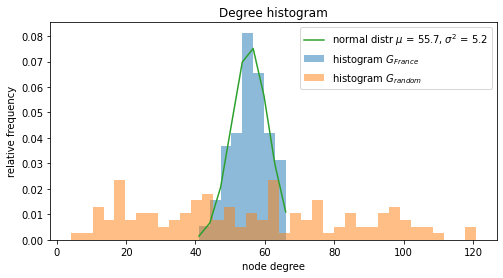

In [179]:
# normalise count to frequency
plt.figure(figsize=(8,4))
bins=8
_, binsrand, _ = plt.hist(degrand, density=1, alpha = 0.5, bins=bins)
binsFr = (max(degFr)-min(degFr))/((max(degrand)-min(degrand))/bins)
plt.hist(degFr, density=1, alpha = 0.5, bins=int(binsFr))


plt.title("Degree histogram")
plt.ylabel("relative frequency")
plt.xlabel("node degree")
mu, sigma = norm.fit(degrand)
print(mu, sigma)
best_fit_linerand = norm.pdf(binsrand, mu, sigma)
plt.plot(binsrand, best_fit_linerand)
plt.legend([f"normal distr $\mu$ = {mu:.1f}, $\sigma^2$ = {sigma:.1f}","histogram $G_{France}$", "histogram $G_{random}$"])

* Visual differences: For $G_{France}$, the frequency of nodes generally decreases for increasing node degrees (meaning that there are fewer nodes with very high node degrees), whereas the node degree frequency of $G_{random}$ increases and reaches a peak around $\mu = 55.7$ before decreasing again. The shape of the histogram resembles a Gaussian curve. The range of the histogram of $G_{France}$ is much larger. Its minimun node degree $k_{min}=4$ is much smaller and maximum node degree $k_{max}=121$ is much larger than that of $G_{random}$ with $k_{min}=41$ and $k_{max}=66$.
* Explanations: As explained in the material from the lecture, random networks as a model for real networks underestimate the number of low degree nodes and and the number of high degree. They do not contain hubs, whereas real networks do. The degree distribution of random networks is a a binomial distribution, but approximates a normal distribution for large N, which is why we can fit the histogram of the random network with a normal distribution.
* Does the Erdős-Rényi ensemble realisation of $G(n,p)$ provide a good approximation for $G_{France}$?
No - as we have seen here both adjacency matrices and degree distributions are too different, the Erdős-Rényi is therefore not a sufficiently good approximation